In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.ticker as mtick

In [ ]:
data=pd.read_csv("/content/webinar-lead.csv")
data

,attended,Lead ID,phone,approval_status,join_time,leave_time,time_in_session,is_guest,country_region_name,source_name,original_source,contacted,webinar_date,registration_date,registration_time
0,No,NaN,7307373409,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,11:44:58
1,No,NaN,9940843414,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,14:39:22
2,No,NaN,7904460317,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,11:39:06
3,No,NaN,9096376402,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,12:42:37
4,No,NaN,7047269627,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,14:48:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42779,Yes,NaN,8800258118,approved,09-12-2023 12:01,09-12-2023 12:19,18,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,09-12-2023,06-Dec-23,15:45:48
42780,Yes,NaN,9342157302,approved,09-12-2023 13:21,09-12-2023 12:47,46,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,09-12-2023,08-Dec-23,12:34:11
42781,Yes,NaN,9930682246,approved,25-11-2023 12:08,25-11-2023 13:13,64,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,25-11-2023,25-Nov-23,12:07:36
42782,Yes,NaN,8582917999,approved,20-01-2024 12:06,20-01-2024 13:02,56,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,20-01-2024,20-Jan-24,11:31:32


In [ ]:
data.shape

(42784, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42784 entries, 0 to 42783
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   attended             42784 non-null  object
 1   Lead ID              29626 non-null  object
 2   phone                38419 non-null  object
 3   approval_status      42784 non-null  object
 4   join_time            4573 non-null   object
 5   leave_time           4573 non-null   object
 6   time_in_session      42784 non-null  int64 
 7   is_guest             42784 non-null  object
 8   country_region_name  4573 non-null   object
 9   source_name          13352 non-null  object
 10  original_source      37947 non-null  object
 11  contacted            33688 non-null  object
 12  webinar_date         42784 non-null  object
 13  registration_date    42784 non-null  object
 14  registration_time    42784 non-null  object
dtypes: int64(1), object(14)
memory usage: 4.9+ MB


In [ ]:
data.describe()

,time_in_session
count,42784.000000
mean,4.230437
std,15.336466
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,125.000000


In [ ]:
data.isnull().sum()

,0
attended,0
Lead ID,13158
phone,4365
approval_status,0
join_time,38211
leave_time,38211
time_in_session,0
is_guest,0
country_region_name,38211
source_name,29432


In [ ]:
# Replace empty entries with nan
data.replace('', np.nan, inplace=True)

# Handle the 'Phone' column to have only numerical values
data['phone'] = data['phone'].str.extract('(\d+)').astype(float)

# Remove duplicates
data.drop_duplicates(inplace=True)
data


,attended,Lead ID,phone,approval_status,join_time,leave_time,time_in_session,is_guest,country_region_name,source_name,original_source,contacted,webinar_date,registration_date,registration_time
0,No,NaN,7.307373e+09,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,11:44:58
1,No,NaN,9.940843e+09,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,14:39:22
2,No,NaN,7.904460e+09,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,11:39:06
3,No,NaN,9.096376e+09,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,12:42:37
4,No,NaN,7.047270e+09,approved,NaN,NaN,0,--,NaN,Linkedin InMail,NaN,NaN,18-11-2023,08-Nov-23,14:48:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42779,Yes,NaN,8.800258e+09,approved,09-12-2023 12:01,09-12-2023 12:19,18,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,09-12-2023,06-Dec-23,15:45:48
42780,Yes,NaN,9.342157e+09,approved,09-12-2023 13:21,09-12-2023 12:47,46,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,09-12-2023,08-Dec-23,12:34:11
42781,Yes,NaN,9.930682e+09,approved,25-11-2023 12:08,25-11-2023 13:13,64,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,25-11-2023,25-Nov-23,12:07:36
42782,Yes,NaN,8.582918e+09,approved,20-01-2024 12:06,20-01-2024 13:02,56,Yes,India,Whatsapp Promotions,Zoom Webinar,Contacted,20-01-2024,20-Jan-24,11:31:32


In [ ]:
# Calculate IQR for numerical columns to see which columns contain outliers
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1                                                                          #Present in "phone"
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers detected in column '{col}':")
        print(outliers)

Outliers detected in column 'phone':
      attended             Lead ID         phone approval_status  \
560         No                 NaN  4.915905e+12        approved   
1423        No                 NaN  9.170070e+12        approved   
3065        No                 NaN  9.779845e+12        approved   
3698        No                 NaN  3.530892e+12        approved   
6766        No                 NaN  4.407442e+12        approved   
...        ...                 ...           ...             ...   
38931      Yes   l:883147356856877  9.109110e+12        approved   
39661      Yes  l:1913635642450056  9.109930e+12        approved   
39692      Yes                 NaN  9.779849e+12        approved   
39711      Yes                 NaN  4.407442e+12        approved   
41024      Yes                 NaN  5.157879e+12          denied   

              join_time        leave_time  time_in_session is_guest  \
560                 NaN               NaN                0       --   
1423

In [ ]:
#verify
data.isnull().sum()

,0
attended,0
Lead ID,12075
phone,3307
approval_status,0
join_time,37128
leave_time,37128
time_in_session,0
is_guest,0
country_region_name,37128
source_name,28349


# **Attendance status of the leads**---*We can get to know how many of the registered leads had attended the webinar*

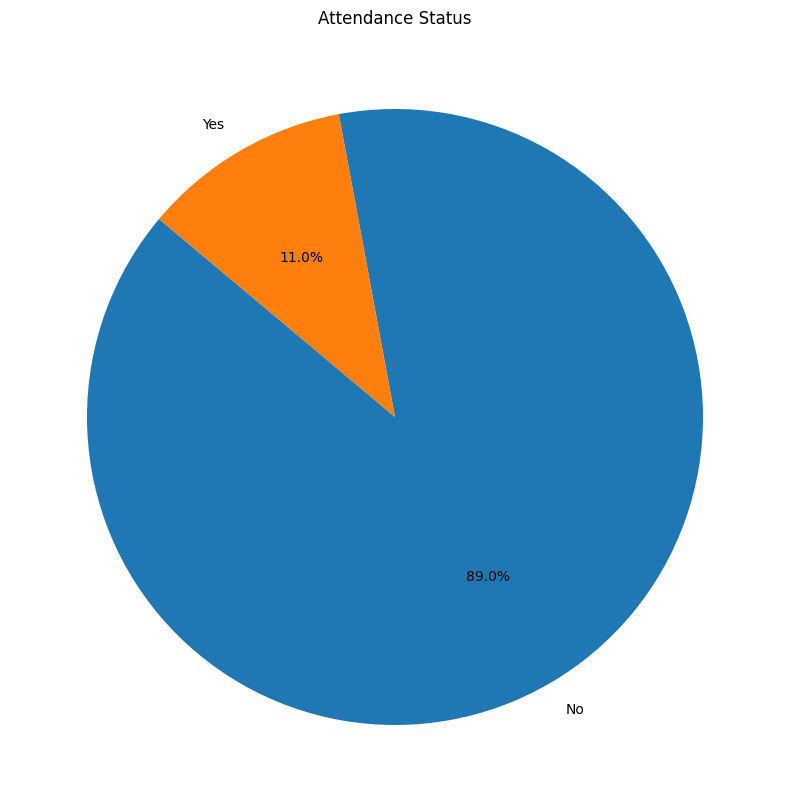

In [ ]:
# Count the occurrences of each category in the 'attended' column
attendance_counts = data['attended'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attendance Status')

plt.show()


# **Source and its count**

1. This graph shows through which source lead got to know about the webinar and its registration

2. Here we can see the attendance count based on source name

3. Here we can see the attendace count based on Original source name
----As per the source name we can see Linkedin and whatsapp are dominating whereas as per the Original source we can see Zoom and Facebook are dominating in attracting the leads.

---- Most of the leads didn't attend the webinar even after the approval of their registration.



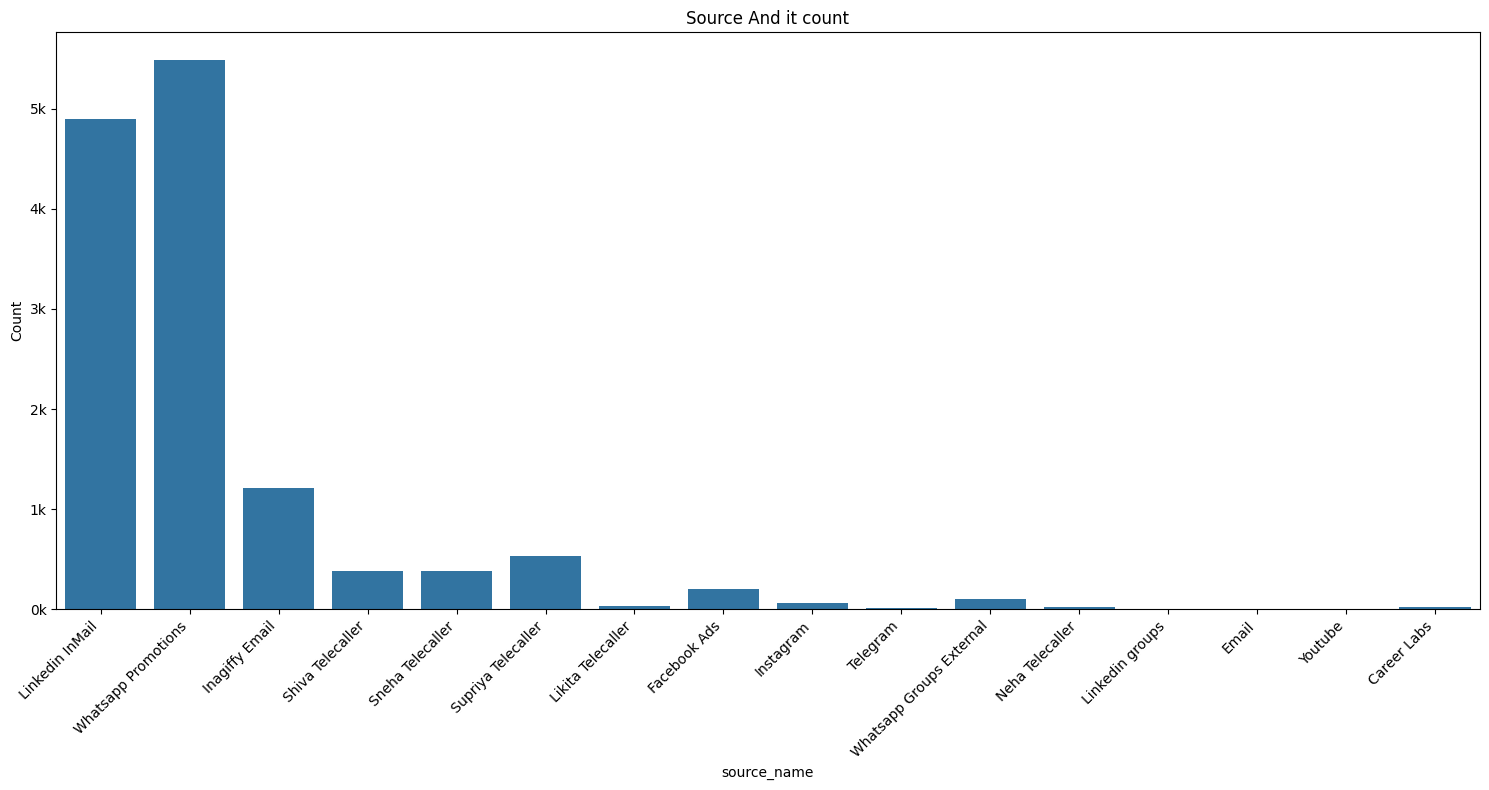

In [ ]:
# *This graph shows the distribution of leads based on their source.
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='source_name')
plt.title('Source And it count')
plt.xlabel('source_name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout()  # adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-13-c8a82c0d6783>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration_date'] = pd.to_datetime(data['registration_date'])


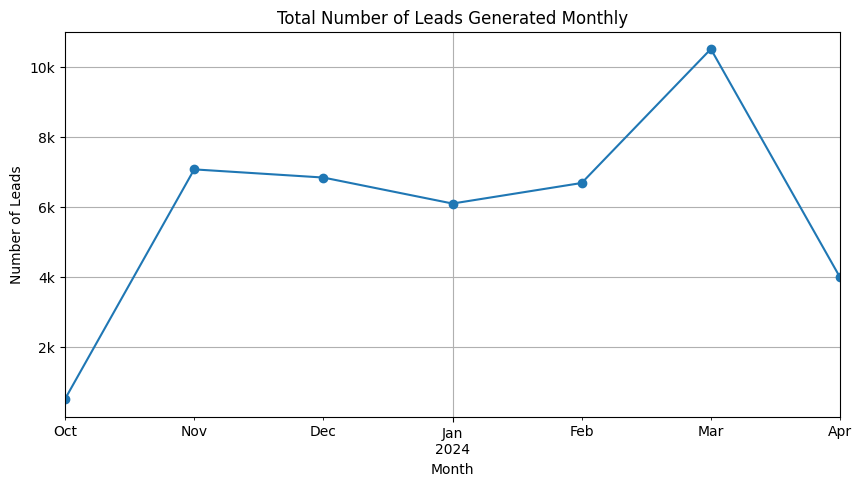

In [ ]:
# Convert 'registration_date' to datetime
data['registration_date'] = pd.to_datetime(data['registration_date'])

# extract month and year
data['registration_month'] = data['registration_date'].dt.to_period('M')

# to count no. of leads generated monthly
monthly_leads = data.groupby('registration_month').size()

# Create a line plot
plt.figure(figsize=(10, 5))
monthly_leads.plot(kind='line', marker='o')
plt.title('Total Number of Leads Generated Monthly')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True)
plt.show()

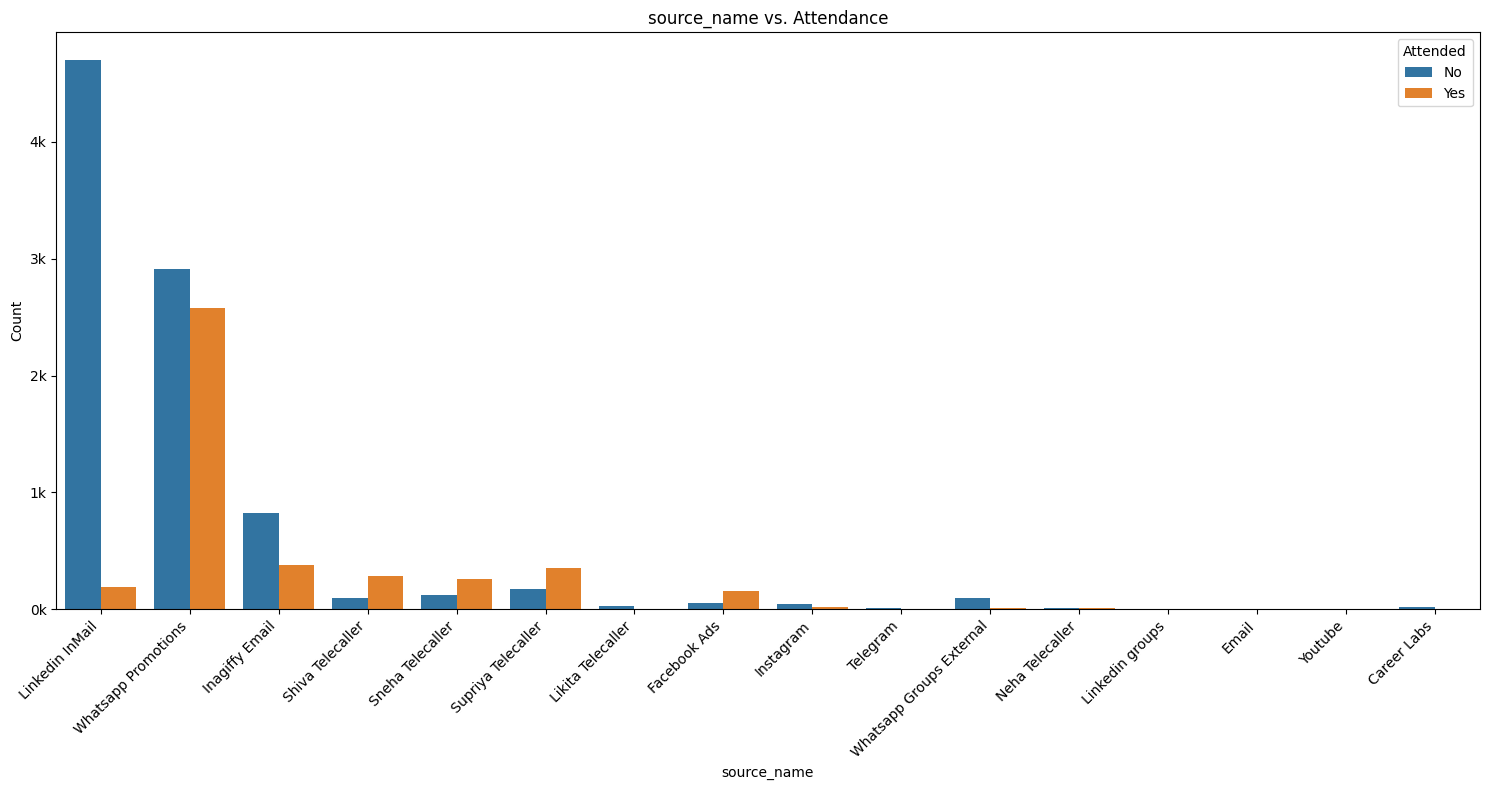

In [ ]:
# **Source vs. Attendance**
# *This graph shows the attendance rate for each lead source.
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='source_name', hue='attended')
plt.title('source_name vs. Attendance')
plt.xlabel('source_name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attended')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.tight_layout()
plt.show()

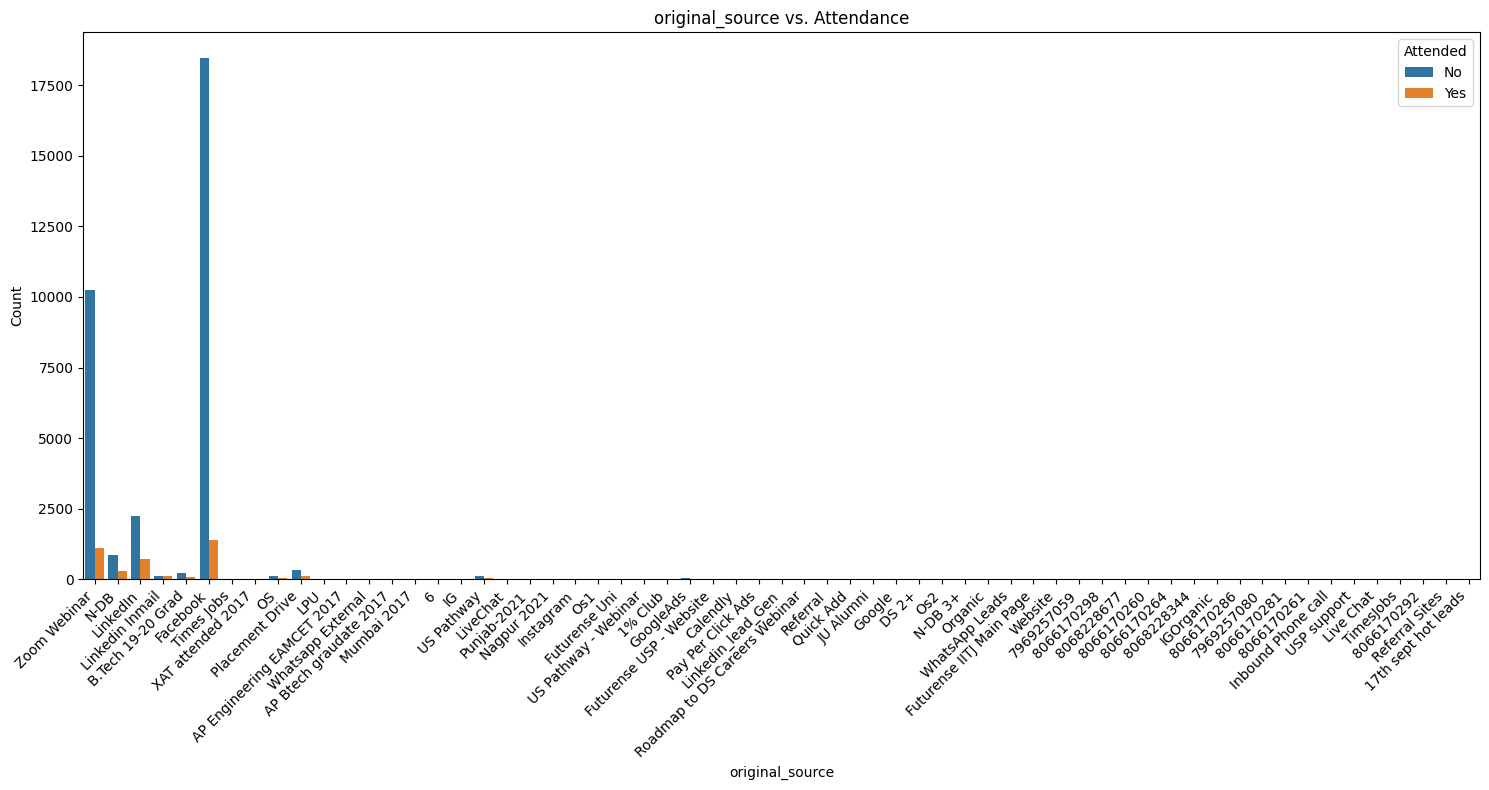

In [ ]:
# **OriginalSource vs. Attendance**
# *This graph shows the attendance rate for each originalsource and its leads.
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='original_source', hue='attended')
plt.title('original_source vs. Attendance')
plt.xlabel('original_source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attended')
plt.tight_layout()
plt.show()

# Session duration trend----*We can see the peak and trough points at 125 and 0 respectively *
we can find the trend of how constantly webinars are running and leads are spending time in sessions.
1. Here we can see point to point data respective of date and time

2. Here we can see the total time spent in a session by leads and we can see that most of the leads left the webinar in the early minutes.

3. This shows approval status vs time in session


*   We can see that the time duration between 15 to 60 is more concentrated because most of the leads were present then.
*   We can see a decrease in the trend after 60 point.
------ This means longer webinars doesn't interest the leads. So having them in limited short timings with greater impact is better.



In [ ]:


fig = px.scatter(
    data,
    y='time_in_session',  # Y-axis: Session Duration in minutes
    x='join_time',  # X-axis: Join Time
    title='Session Duration Distribution Over Time',  # Title of the chart
    labels={'time_in_session': 'Duration (minutes)', 'join_time': 'Join Time'}  # Custom axis labels
)

# Update axis titles
fig.update_layout(
    xaxis_title='Join Time',  # X-axis title
    yaxis_title='Session Duration (minutes)'  # Y-axis title
)

# Display the box plot
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



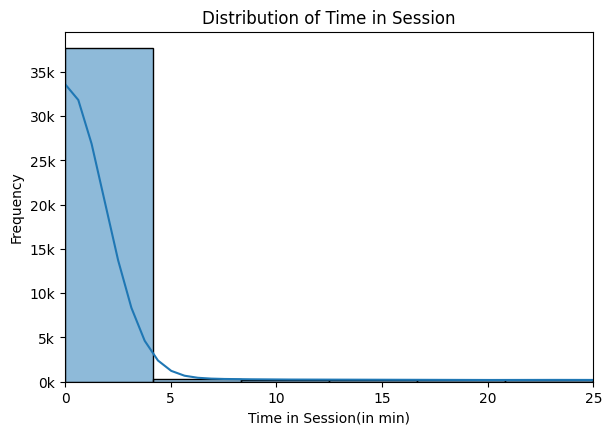

In [ ]:
# Set up the visualizations
plt.figure(figsize=(15, 10))

# Histogram for 'time_in_session'
plt.subplot(2, 2, 1)
sns.histplot(data['time_in_session'], bins=30, kde=True)
plt.title('Distribution of Time in Session')
plt.xlabel('Time in Session(in min)')
plt.ylabel('Frequency')
plt.xlim(0, 25)
plt.xticks(range(0, 26, 5))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))



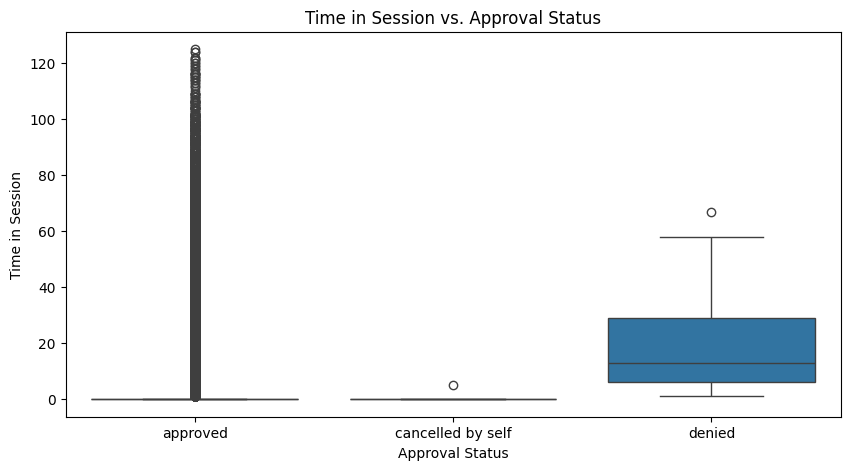

In [ ]:
# Scatter plot: time_in_session vs. approval_status
plt.figure(figsize=(10, 5))
sns.boxplot(x='approval_status', y='time_in_session', data=data)
plt.title('Time in Session vs. Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Time in Session')
plt.show()

# **Attendance as per day and time:**

*  In the first graph we can see attendance vs day of the week.
*  In the second graph we can see attendace vs time of the day(hour).
---- This means Tuesday, Saturday and Sunday are the best time to organize a webinar because most of them are active on these days. It might be because of weekends on Sat and Sundays
---- Hour 11-12 is the best time to conduct the webinar as many of them joined at this time and we can say that evenings are least possible time to conduct it.



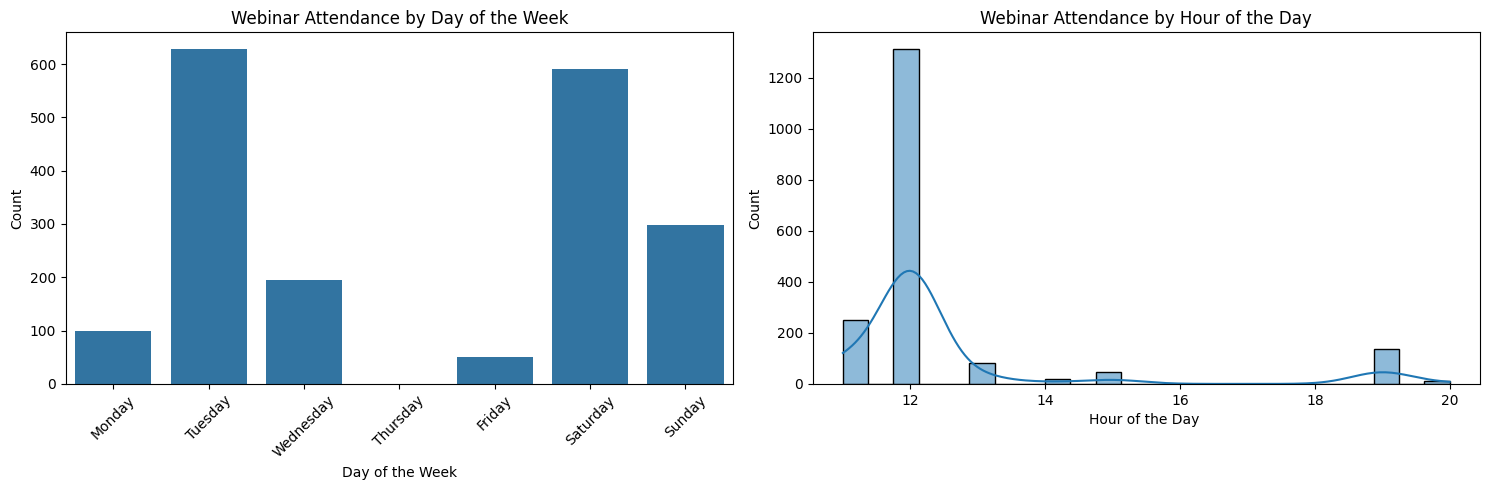

In [ ]:

# Convert join_time to datetime
data['join_time'] = pd.to_datetime(data['join_time'], errors='coerce')

# Day of the webinar in a week
data['day_of_week'] = data['join_time'].dt.day_name()

# Time of the webinar in a day
data['hour_of_day'] = data['join_time'].dt.hour

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Webinar Attendance by Day  in a week
sns.countplot(data=data, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axs[0])
axs[0].set_title('Webinar Attendance by Day of the Week')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Time of the webinar in a day and its attendace
sns.histplot(data['hour_of_day'], bins=24, kde=True, ax=axs[1])
axs[1].set_title('Webinar Attendance by Hour of the Day')
axs[1].set_xlabel('Hour of the Day ')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
data.to_csv('internship_webinarleads1.csv', index=False)


# Summary
**Attendance analysis**

*   Most of the registered candidates haven't attended the meeting.

**Source Distribution**

*   Linkedin and Whatsapp are the major lead sources
*   As per the original source record Zoom and Facebook are the major lead sources.




**Presence in the session**

*   Most of the attendees left the meet in the first few minutes (5).
*   As per the report meets should be conducted productively.
*   We can also see that 12 noon is the best participation time.




